In [1]:
import numpy as np
import pandas as pd

In [2]:
#Importando sellers
seller = pd.read_csv('Datasets/olist_sellers_dataset.csv', sep=',', encoding='iso-8859-1')

In [3]:
#Vendo se existe vendedores repetidos na coluna seller_id no dataframe seller
print(seller['seller_id'].value_counts())

seller_id
3442f8959a84dea7ee197c632cb2df15    1
e26901d5ab434ce92fd9b5c256820a4e    1
7e3f87d16fb353f408d467e74fbd8014    1
9140bd1d9de28b197dce077bdd687438    1
a2b911e9ad40dc7d61c142a4683e2d85    1
                                   ..
f918546be4bec7104d117789ba758b2b    1
eb4a59a06b3948e851a7d7a830bcbc42    1
80146bc52c4f6af5239b23de2a20262b    1
4091f77d8c768fc3e81c20761471761d    1
9e25199f6ef7e7c347120ff175652c3b    1
Name: count, Length: 3095, dtype: int64


In [4]:
#Importando order_items e criando um novo dataframe 
or_it = pd.read_csv('Datasets/olist_order_items_dataset.csv', sep=',', encoding='iso-8859-1')

In [5]:
#Relacionando dataframes para obter mais informações
seller_or_it = pd.merge(seller, or_it, on='seller_id', how='inner')

In [6]:
#Eliminando duplicidade de dados por meio do drop e criando um novo dataframe
seller_or_it.drop_duplicates(subset=['seller_id'])

,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,4a90af3e85dd563884e2afeab1091394,1,ffb64e34a37740dafb6c88f1abd1fa61,2017-08-25 20:50:19,106.20,9.56
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,035201c3c82a97f8a25dd6bd5244b2d5,1,1c36a5285f7f3b1ed2637d7c528ce5ff,2017-11-22 04:30:29,89.99,45.09
44,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,02ae2a6d1d1f1432dc743ca4f67033df,1,0a6cff78b203b5224378cf8db2dff5a6,2018-08-03 12:44:49,158.00,16.21
45,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,4e7838e2ac3b81d9d9ca377dcc0549de,1,c4c7585167f8d6dc4ccc0b38f0d820ca,2018-08-09 00:44:08,79.99,15.66
46,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,51c6d2f460589fa7b65f2da51e860206,1,c98bf47f7bea8f3aee82fa023786b8a1,2017-11-24 12:15:25,167.99,31.93
...,...,...,...,...,...,...,...,...,...,...
112619,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR,186d853ccb29e4bc2470952ec61dbb39,1,52261c8a90724edab7b960c69dbf7a9c,2018-07-19 03:10:19,79.00,14.85
112621,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC,00d8d65b666158b633f96054d31af43b,1,a0450529bd974ebeaf93b1731184396a,2017-10-23 04:24:35,94.90,35.98
112631,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP,2ed40a95fdd7b319825703d38149a570,1,ca977202f2d5bc9cfdc368d305e460b8,2018-08-23 19:25:15,42.31,7.56
112638,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS,1ad1ca4550bd6dbd299d8538a86e5400,1,e891d4a9622cae3b9fc2ec558bda155b,2017-04-10 10:05:10,27.00,16.05


In [7]:
#DESCOBRINDO OS 10 MELHORES SELLERS DE ACORDO COM A RECEITA

In [8]:
# Passo 1: Calculando a receita de cada vendedor
receita_por_seller = seller_or_it.groupby('seller_id')['price'].sum()


# Passo 2: Ordenando os vendedores com base em sua receita
sellers_ordenados_por_receita = receita_por_seller.sort_values(ascending=False)

# Passo 3: Selecionando os top 10 vendedores com a maior receita
top_10_maiores_sellers = sellers_ordenados_por_receita.head(10)
df_top_10 = pd.DataFrame(top_10_maiores_sellers).reset_index()
df_top_10.columns = ['seller_id', 'price']

df_top_10.head(10)

,seller_id,price
0,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1,53243585a1d6dc2643021fd1853d8905,222776.05
2,4a3ca9315b744ce9f8e9374361493884,200472.92
3,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
4,7c67e1448b00f6e969d365cea6b010ab,187923.89
5,7e93a43ef30c4f03f38b393420bc753a,176431.87
6,da8622b14eb17ae2831f4ac5b9dab84a,160236.57
7,7a67c85e85bb2ce8582c35f2203ad736,141745.53
8,1025f0e2d44d7041d6cf58b6550e0bfa,138968.55
9,955fee9216a65b617aa5c0531780ce60,135171.70


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

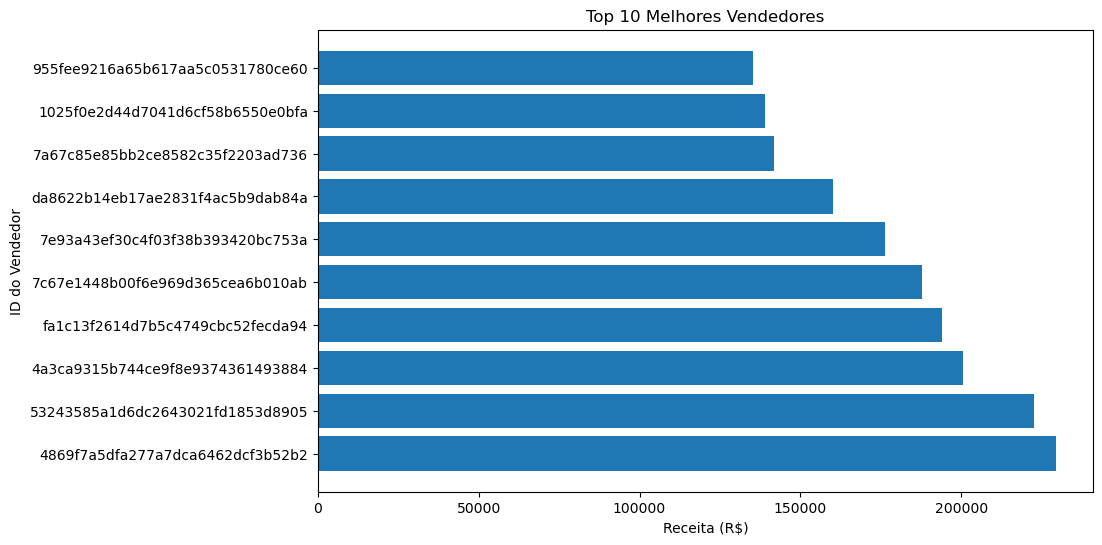

In [10]:
# Criando gráfico em barras para melhor visualização dos melhores vendedores
plt.figure(figsize=(10, 6))
plt.barh(df_top_10['seller_id'], df_top_10['price'])
plt.title('Top 10 Melhores Vendedores')
plt.xlabel('Receita (R$)')
plt.ylabel('ID do Vendedor')
plt.savefig('Top 10 Melhores Vendedores')
plt.show()